In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("nyc_census_tracts.csv", header = 0)

In [4]:
data.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [6]:
data.dtypes

CensusTract          int64
County              object
Borough             object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap       float64
IncomePerCapErr    float64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
dtype: object

In [15]:
data

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2
5,36005002000,Bronx,Bronx,8516,3301,5215,61.1,1.6,31.1,0.3,...,4.3,1.0,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2
6,36005002300,Bronx,Bronx,4774,2130,2644,62.3,0.2,36.5,1.0,...,14.0,1.5,4.1,42.7,1191,74.2,16.1,9.7,0.0,18.9
7,36005002400,Bronx,Bronx,150,109,41,0.0,52.0,48.0,0.0,...,0.0,0.0,0.0,NaN,113,62.8,37.2,0.0,0.0,0.0
8,36005002500,Bronx,Bronx,5355,2338,3017,76.5,1.5,18.9,0.0,...,17.7,1.8,2.7,35.5,1691,85.1,8.3,6.1,0.5,9.4
9,36005002701,Bronx,Bronx,3016,1375,1641,68.0,0.0,31.2,0.0,...,18.0,0.0,1.6,42.8,1102,86.9,8.5,4.5,0.0,15.2


In [13]:
zero = data.loc[data['Employed'] == 0]

In [14]:
zero

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
97,36005016300,Bronx,Bronx,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
103,36005017100,Bronx,Bronx,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
180,36005024900,Bronx,Bronx,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
349,36047001800,Kings,Brooklyn,2075,1965,110,52.9,13.4,26.5,1.5,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
402,36047008600,Kings,Brooklyn,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
452,36047015400,Kings,Brooklyn,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
470,36047017500,Kings,Brooklyn,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
472,36047017700,Kings,Brooklyn,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
684,36047040700,Kings,Brooklyn,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [24]:
data['Women_percentage'] = data['Women']/data['TotalPop']*100

In [25]:
data['Men_percentage'] = data['Men']/data['TotalPop']*100
data['Employed_percentage'] = data['Employed']/data['TotalPop']*100

In [27]:
data.head()
del data["Female_percentage"]

In [28]:
data.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Women_percentage,Men_percentage,Employed_percentage
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,7.399714,92.600286,0.000000
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,43.0,2308,80.8,16.2,2.9,0.0,7.7,50.786600,49.213400,42.717009
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,45.0,2675,71.7,25.3,2.5,0.6,9.5,51.039730,48.960270,45.224007
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,38.8,2120,75.0,21.3,3.8,0.0,8.7,56.489199,43.510801,36.060555
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,45.4,1083,76.8,15.5,7.7,0.0,19.2,53.454265,46.545735,41.798533


In [40]:
data2 = data.drop(data[data.Employed == 0].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184863F7198>,
      dtype=object)

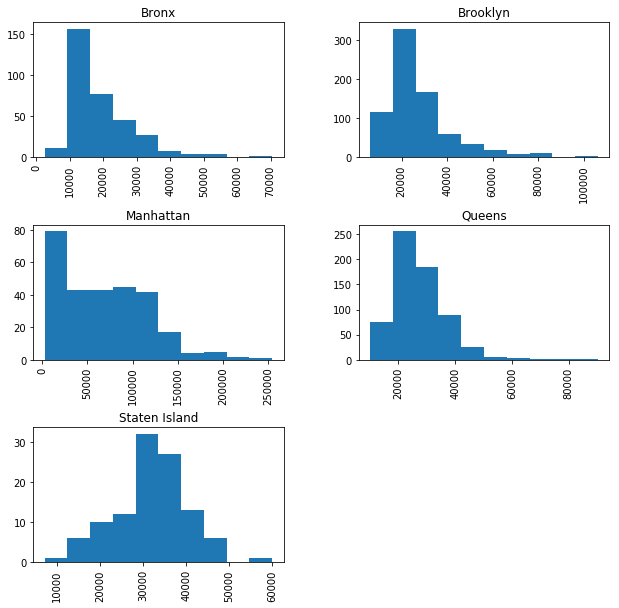

In [52]:
#plot Borough and Income per Capita
data.hist(column='IncomePerCap', by=data["Borough"], figsize = (10,10) )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001848673DA58>,
      dtype=object)

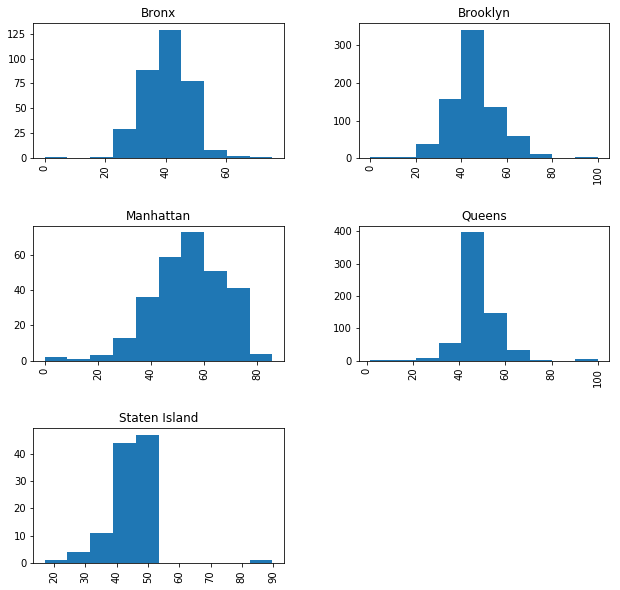

In [55]:
#plot Borough and Income per Capita
data.hist(column='Employed_percentage', by=data["Borough"], figsize = (10,10) )